In [10]:
import numpy as np
import matplotlib.pyplot as plt
from geometry_tools import hyperbolic, drawtools, coxeter, automata
from numpy import pi, log

# make a right-angled pentagon
triangle_group = coxeter.TriangleGroup((2,3,7))
triangle_rep = triangle_group.hyperbolic_rep()

In [11]:
vertices = triangle_rep.isometries(["ab", "bc", "ca"]).fixed_point()
fund_triangle = hyperbolic.Polygon(vertices)

triangle_fsa = triangle_group.automaton(even_length=True)
pos_isometries = triangle_rep.automaton_accepted(triangle_fsa, 30)

basepoint = hyperbolic.Point((0,1), model="halfplane")
orbit = pos_isometries @ basepoint
len(orbit)

425321

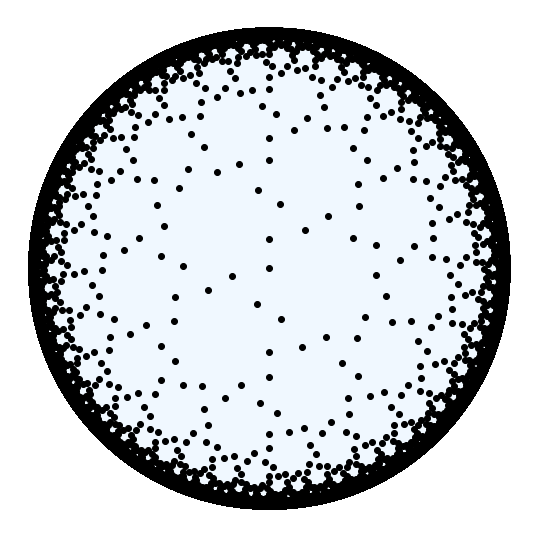

In [3]:
figure = drawtools.HyperbolicDrawing()
figure.draw_plane()
figure.draw_point(orbit)

425321


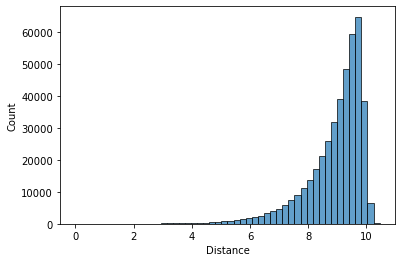

In [12]:
distances = basepoint.distance(orbit)
print(len(distances))
plt.hist(distances, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

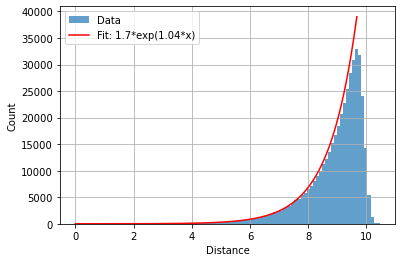

Fitted parameters: a = 1.67, b = 1.04


In [13]:
# Create histogram
counts, bins, _ = plt.hist(distances, bins=100, density=False, alpha=0.7, label='Data')
bin_centers = (bins[:-1] + bins[1:]) / 2

# Find peak index and use only data before it
peak_idx = np.argmax(counts)
x = bin_centers[:peak_idx+1]  # include the peak
counts_before_peak = counts[:peak_idx+1]

# Take logs of positive counts before peak
mask = counts_before_peak > 0
log_counts = np.log(counts_before_peak[mask])
x = x[mask]

# Fit line to log data
coeffs = np.polyfit(x, log_counts, 1)

# Convert back to exponential parameters
a = np.exp(coeffs[1])  # y-intercept becomes exp coefficient
b = coeffs[0]          # slope stays the same

# Generate points for the fitted curve
x_fit = np.linspace(min(bins), bin_centers[peak_idx], 1000)
y_fit = a * np.exp(b * x_fit)

# Plot original histogram and fit
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: {a:.1f}*exp({b:.2f}*x)')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: a = {a:.2f}, b = {b:.2f}")

In [14]:
crit_exp = b
# Filter to unit interval
filtered = [point for point in orbit if abs(point.halfspace_coords()[0]) < 1 and abs(point.halfspace_coords()[0]) < 1e-3]
print(len(filtered))

313


In [27]:
dirac_sum = sum(np.exp(-crit_exp * basepoint.distance(point)) for point in filtered)
normalized = sum(np.exp(-crit_exp * basepoint.distance(point)) for point in orbit)
measure = dirac_sum / normalized
measure

0.5468449493886033